<a href="https://colab.research.google.com/github/boorashiva12/AIML-Training-Shiva/blob/main/Assignment_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question-1**

**Data Transformation**
    
  a) Try creating different coordinate system and plot MNIST data in coordinate system which best separates the data.
  
  b) Consider housing data, filter rows based on sqft_living >2000 sqft and plot the trend of price in this filtered data.

  c) Create a small table with categorical data, numerical data and null values. try to find the correlation between those columns.
Consider housing data, filter rows based on sqft_living >2000 sqft and plot the trend of price in this filtered data.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set(color_codes = True)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:

#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
house_data = pd.read_csv('/content/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [3]:
data1= house_data[house_data['sqft_living'] >2000]
data1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5,7237550310,20140512T000000,1225000.000,4,4.500,5420,101930,1.000,0,0,...,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930
10,1736800520,20150403T000000,662500.000,3,2.500,3560,9796,1.000,0,0,...,8,1860,1700,1965,0,98007,47.601,-122.145,2210,8925
15,9297300055,20150124T000000,650000.000,4,3.000,2950,5000,2.000,0,3,...,9,1980,970,1979,0,98126,47.571,-122.375,2140,4000
21,2524049179,20140826T000000,2000000.000,3,2.750,3050,44867,1.000,0,4,...,9,2330,720,1968,0,98040,47.532,-122.233,4110,20336


**Price trends**

Text(0.5, 1.0, 'Price Trends')

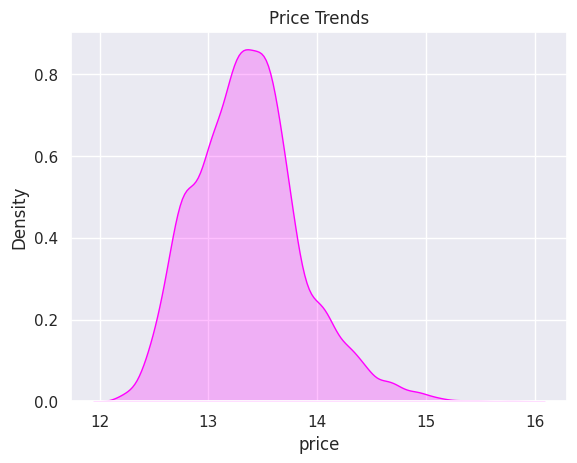

In [4]:
price_data = np.log(data1.price)
sns.kdeplot(price_data,color='magenta',fill=True)

#DrawHistogram(train_data.price)
plt.xlabel('price')
plt.title('Price Trends')

**Question-2**

 a)Try to predict the class label based on k values 3,5,7
 b)Try KNN using different distance metrics



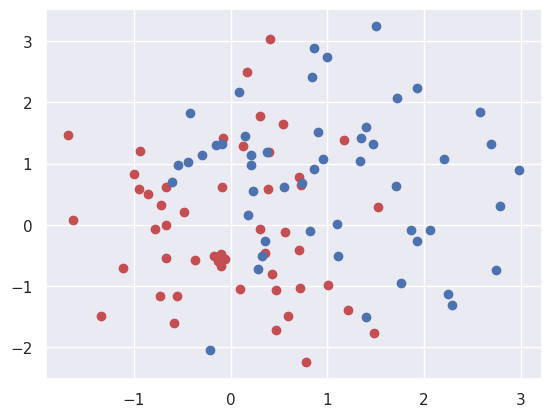

In [5]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

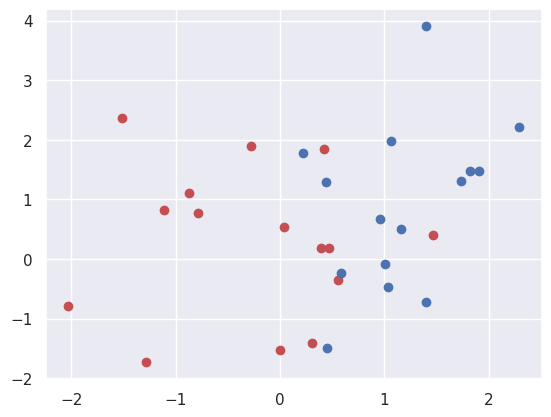

In [6]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
80.0


In [8]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
73.33333333333333


In [9]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
66.66666666666666


**Question-2**

 b)Try KNN using different distance metrics

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0
5,5.400,3.900,1.700,0.400,0
6,4.600,3.400,1.400,0.300,0
7,5.000,3.400,1.500,0.200,0
8,4.400,2.900,1.400,0.200,0
9,4.900,3.100,1.500,0.100,0


In [11]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [12]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [13]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [14]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [15]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [16]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



**Question-3**

**Regression**:
    Try with different values of alpha(regularization parameter) for both ridge and lasso and observe the results
    Try with higher degrees in polynomial Regression

In [17]:
train_data = house_data

In [18]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [19]:
train_data.shape

(21613, 21)

In [20]:
main_features3 = ['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [21]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

**Lasso Regression**

In [22]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1)

Mean squared error:41424347596.95081
Root mean squared logarithmic error: 203529.72165497308
R-squared value: 0.6516745670001088
Accuracy: 65%


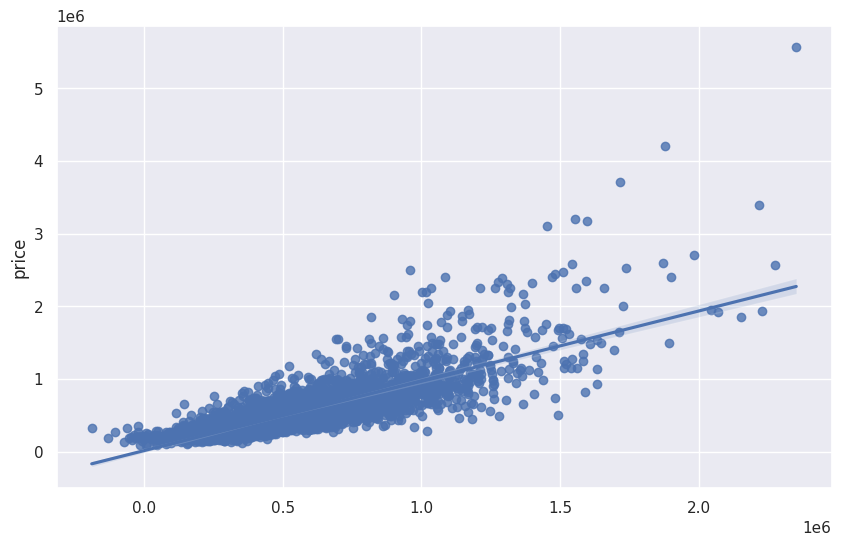

In [23]:
# Normalize the training and test data


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Create and fit the Ridge regression model
ridgeReg = Ridge(alpha=0.01)
ridgeReg.fit(X_train_scaled, y_train3)

# Make predictions on the test data
predictions3 = ridgeReg.predict(X_test_scaled)

# Evaluate the model
printStatistics(y_test3, predictions3)
accuracy = ridgeReg.score(X_test_scaled, y_test3)

print("Accuracy: {}%".format(int(round(accuracy * 100))))


In [24]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.6543922415727528


**Polynomial Regression (degree =2)**

Mean squared error:32220387056.434875
Root mean squared logarithmic error: 179500.3817723931
R-squared value: 0.7290680258369866
Accuracy: 73%


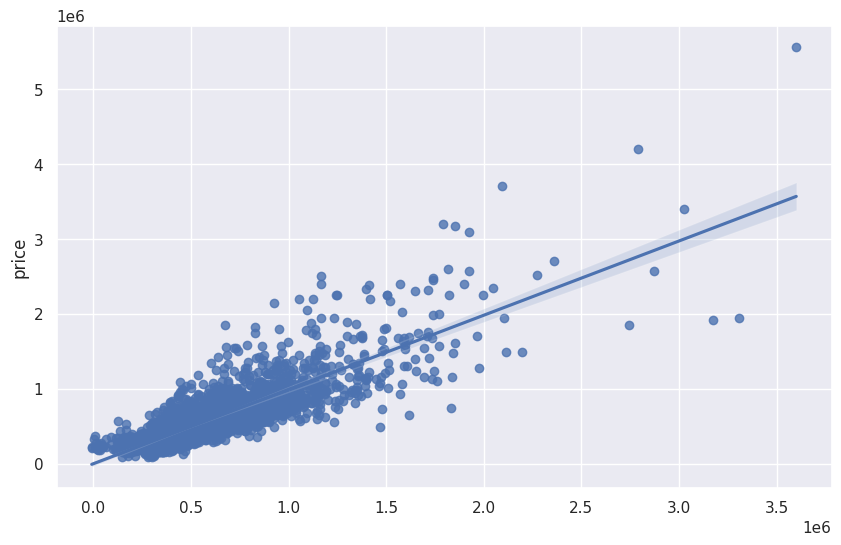

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)

LinearReg = linear_model.LinearRegression()
QuadraticPolynomial = LinearReg.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
print("Accuracy: {}%".format(int(round(accuracy * 100))))

**Polynomial Regression (degree =4)**

Mean squared error:39563925063.10823
Root mean squared logarithmic error: 198906.8250792522
R-squared value: 0.6673183253754652
Accuracy: 67%


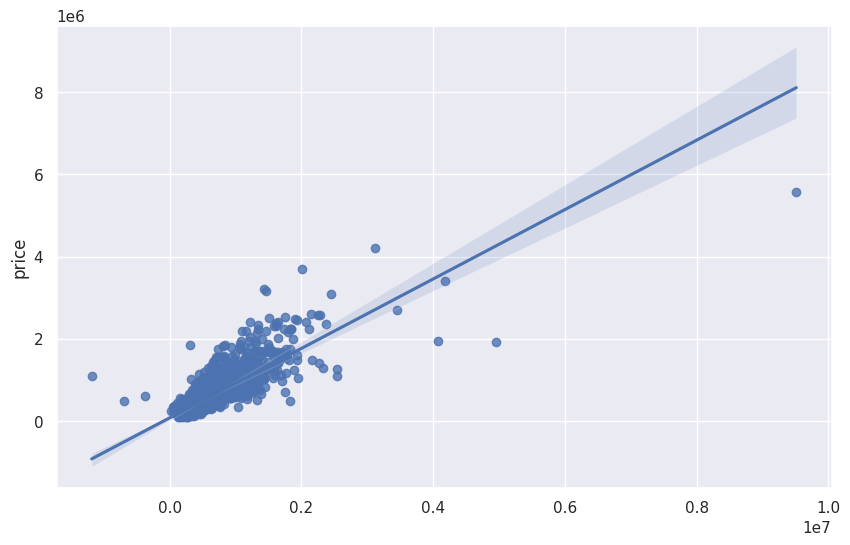

In [30]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=4)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)

LinearReg2 = linear_model.LinearRegression()
QuadraticPolynomial = LinearReg2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
print("Accuracy: {}%".format(int(round(accuracy * 100))))

**Question-4**

 Try creating K-Means algorithm from scratch
 Plot the clusters


In [27]:

import random as rd

In [31]:
df = pd.read_csv("/content/bank_marketing_dataset.csv")

In [32]:
df.shape

(25095, 21)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,25095.000,40.195,9.249,18.000,33.000,39.000,47.000,61.000
duration,25095.000,252.500,262.174,0.000,99.000,171.000,306.000,4918.000
campaign,25095.000,2.869,3.266,1.000,1.000,2.000,3.000,56.000
pdays,25095.000,998.604,19.855,1.000,999.000,999.000,999.000,999.000
previous,25095.000,0.009,0.093,0.000,0.000,0.000,0.000,1.000
emp.var.rate,25095.000,1.242,0.318,-0.100,1.100,1.400,1.400,1.400
cons.price.idx,25095.000,93.909,0.348,93.200,93.918,93.918,93.994,94.465
cons.conf.idx,25095.000,-39.198,3.029,-42.700,-42.700,-36.400,-36.400,-36.100
euribor3m,25095.000,4.893,0.154,4.153,4.858,4.960,4.963,5.045
nr.employed,25095.000,5215.210,17.473,5191.000,5191.000,5228.100,5228.100,5228.100


In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [35]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.100,93.994,-36.400,4.857,5191.000,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.100,93.994,-36.400,4.857,5191.000,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.100,93.994,-36.400,4.857,5191.000,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.100,93.994,-36.400,4.857,5191.000,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.100,93.994,-36.400,4.857,5191.000,...,0,1,0,0,0,0,1,0,1,0


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [38]:
df_scaled = scaler.fit_transform(df_dummies)

In [39]:
### Example of from-scratch implimentation of Kmeans Clustering -


class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]

    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([])
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T

    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)

        for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]

        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]

            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)

            self.Output=Y


    def predict(self):
        return self.Output,self.Centroids.T

    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss




In [44]:
### To call k-means function-

kmeans=Kmeans(df_scaled,K=3)
kmeans.fit(n_iter = 20)
Output,Centroids=kmeans.predict()

ValueError: ignored

In [ ]:
type(kmeans)

In [ ]:
# #filter rows of original data
filtered_label0 = df_dummies[cluster_labels == 0]

filtered_label8 = df_dummies[cluster_labels == 2]
# #plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1], color = 'black')
plt.show()

In [ ]:
# #Getting unique labels
u_labels = np.unique(cluster_labels)

# #plotting the results:
for i in u_labels:
    plt.scatter(
        df_dummies.iloc[cluster_labels == i , 0].values ,
        df_dummies.iloc[cluster_labels == i , 1].values ,
        cluster_labels = i)
plt.legend()
plt.show()